## *Fetch Data*: ASSETS INFORMATION

In [1]:
# Code Ref: https://github.com/IgorWounds/Kraken-API---A-Complete-Guide-Algotrading101/blob/main/Kraken%20Public%20Endpoints.ipynb

In [2]:
# Initial imports
from time import sleep
import krakenex
import requests
import pandas as pd
from pykrakenapi import KrakenAPI
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# Set API keys and secret
api = krakenex.API()
k = KrakenAPI(api)
#api.load_key('KrakenPass.txt')

In [4]:
# Get asset info
data = k.get_asset_info()

In [5]:
# Get prices
ticker = k.get_ticker_information('BTCUSD')

public call frequency exceeded (seconds=0.777874) 
 sleeping for 5 seconds


In [6]:
data1 = requests.get('https://api.kraken.com/0/public/Assets').json()

## 1. Historical Data, short window, long window

In [7]:
ohlc = k.get_ohlc_data('BTCUSD', interval=1440, ascending = True)
# Drop NAs (Should we replace NAs?)
ohlc[0]['close'] = ohlc[0]['close'].dropna()
ohlc[0]

public call frequency exceeded (seconds=0.360269) 
 sleeping for 5 seconds


,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2019-06-18,1560816000,9335.0,9355.0,8943.0,9080.5,9115.3,6320.076050,22083
2019-06-19,1560902400,9077.3,9323.3,9040.0,9277.1,9157.0,4408.223007,14119
2019-06-20,1560988800,9282.1,9600.0,9213.2,9534.3,9402.8,6475.264001,22100
2019-06-21,1561075200,9533.2,10250.0,9533.2,10219.2,9835.0,9099.706904,29051
2019-06-22,1561161600,10216.2,11216.8,10000.0,10663.8,10665.9,12842.485863,54100
...,...,...,...,...,...,...,...,...
2021-06-02,1622592000,36676.4,38209.2,35929.2,37565.3,37428.5,6307.979380,43478
2021-06-03,1622678400,37565.3,39471.0,37159.1,39196.6,38554.9,5230.076287,36795
2021-06-04,1622764800,39212.3,39249.8,35576.7,36847.7,37066.4,4991.517443,46978


In [8]:
"""
short_window = 5
long_window = 20
#short window moving average
ohlc[0]['short_window'] = ohlc[0]['close'].rolling(short_window).mean()

#long window moving average
ohlc[0]['long_window'] = ohlc[0]['close'].rolling(long_window).mean()

ohlc[0].tail()
"""

"\nshort_window = 5\nlong_window = 20\n#short window moving average\nohlc[0]['short_window'] = ohlc[0]['close'].rolling(short_window).mean()\n\n#long window moving average\nohlc[0]['long_window'] = ohlc[0]['close'].rolling(long_window).mean()\n\nohlc[0].tail()\n"

In [9]:
"""
fig = go.Figure(data=[go.Candlestick(x = ohlc[0].index,
                                    open = ohlc[0]['open'],
                                    high = ohlc[0]['high'],
                                    low = ohlc[0]['low'],
                                    close = ohlc[0]['close'],
                                    ),
                     go.Scatter(x=ohlc[0].index, y=ohlc[0]['long_window'], line=dict(color='purple', width=1))])

fig.show()
"""

"\nfig = go.Figure(data=[go.Candlestick(x = ohlc[0].index,\n                                    open = ohlc[0]['open'],\n                                    high = ohlc[0]['high'],\n                                    low = ohlc[0]['low'],\n                                    close = ohlc[0]['close'],\n                                    ),\n                     go.Scatter(x=ohlc[0].index, y=ohlc[0]['long_window'], line=dict(color='purple', width=1))])\n\nfig.show()\n"

In [10]:
"""
## 2. get Order Book data
book = k.get_order_book('XXBTZUSD', count = 20)
print(book[0].head())
print(book[1].head())
"""

"\n## 2. get Order Book data\nbook = k.get_order_book('XXBTZUSD', count = 20)\nprint(book[0].head())\nprint(book[1].head())\n"

# Trading Signal Features

---

### Import Libraries and Dependencies

In [11]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Construct Bollinger Band (Trading Signal)

In [12]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
ohlc[0]['bollinger_mid_band'] = ohlc[0]['close'].rolling(window=bollinger_window).mean()
ohlc[0]['bollinger_std'] = ohlc[0]['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
ohlc[0]['bollinger_upper_band']  = ohlc[0]['bollinger_mid_band'] + (ohlc[0]['bollinger_std'] * 1)
ohlc[0]['bollinger_lower_band']  = ohlc[0]['bollinger_mid_band'] - (ohlc[0]['bollinger_std'] * 1)

# Calculate bollinger band trading signal
ohlc[0]['bollinger_long'] = np.where(ohlc[0]['close'] < ohlc[0]['bollinger_lower_band'], 1.0, 0.0)
ohlc[0]['bollinger_short'] = np.where(ohlc[0]['close'] > ohlc[0]['bollinger_upper_band'], -1.0, 0.0)
ohlc[0]['bollinger_signal'] = ohlc[0]['bollinger_long'] + ohlc[0]['bollinger_short']

ohlc[0].tail(30)

,time,open,high,low,close,vwap,volume,count,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
dtime,,,,,,,,,,,,,,,
2021-05-08,1620432000,57388.0,59521.4,57000.0,58953.8,58648.2,4318.905298,54412,54934.945,2782.690387,57717.635387,52152.254613,0.0,-1.0,-1.0
2021-05-09,1620518400,58951.5,59264.0,56326.0,58293.1,57925.2,4279.908544,53039,55063.600,2878.722318,57942.322318,52184.877682,0.0,-1.0,-1.0
2021-05-10,1620604800,58320.5,59598.8,53470.0,55888.1,57137.3,6706.459284,77348,55033.005,2865.875779,57898.880779,52167.129221,0.0,0.0,0.0
2021-05-11,1620691200,55887.6,56949.9,54538.5,56747.5,55838.1,3816.343837,46918,55179.620,2875.286353,58054.906353,52304.333647,0.0,0.0,0.0
2021-05-12,1620777600,56754.7,57983.6,48605.0,49502.7,53814.8,8462.398142,86306,55068.255,3053.536861,58121.791861,52014.718139,1.0,0.0,1.0
2021-05-13,1620864000,49502.7,51412.4,45000.0,49675.2,49361.2,13358.336264,126344,54993.080,3170.597141,58163.677141,51822.482859,1.0,0.0,1.0
2021-05-14,1620950400,49675.2,51540.0,48886.0,49899.0,50135.0,5361.720080,66441,54983.360,3186.665769,58170.025769,51796.694231,1.0,0.0,1.0
2021-05-15,1621036800,49899.0,50827.3,46600.0,46771.1,48568.2,5671.809460,59079,54866.590,3445.614772,58312.204772,51420.975228,1.0,0.0,1.0
2021-05-16,1621123200,46761.0,49828.8,43824.3,46482.4,46416.8,8209.374032,79473,54488.115,3922.532866,58410.647866,50565.582134,1.0,0.0,1.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='dtime'>

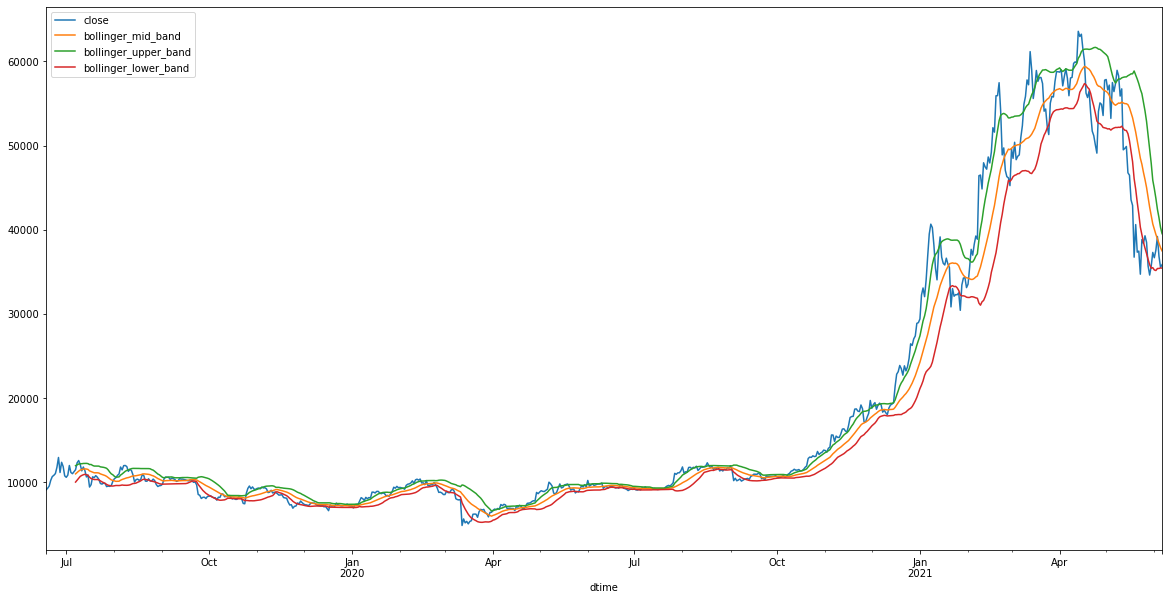

In [13]:
# Plot the Bollinger Bands for BTC/USD closing prices
ohlc[0][['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [14]:
import time
import os
import requests
from dotenv import load_dotenv

# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
kraken_api_key = os.getenv("KRAKEN_API_KEY")
kraken_private_key = os.getenv("KRAKEN_PRIVATE_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Kraken Key type: {type(kraken_api_key)}")
print(f"Kraken Private Key type: {type(kraken_private_key)}")

Kraken Key type: <class 'str'>
Kraken Private Key type: <class 'str'>


In [16]:
"""
## INVESTMENT STRATEGY (KRAKEN)

import time
import os
import requests

# Read Kraken API key and secret stored in environment variables
api_url = "https://api.kraken.com"
api_key = os.environ['KRAKEN_API_KEY']
api_sec = os.environ['KRAKEN_PRIVATE_KEY']

# Attaches auth headers and returns results of a POST request
def kraken_request(uri_path, data, api_key, api_sec):
    headers = {}
    headers['API-Key'] = api_key
    # get_kraken_signature() as defined in the 'Authentication' section
    headers['API-Sign'] = get_kraken_signature(uri_path, data, api_sec)             
    req = requests.post((api_url + uri_path), headers=headers, data=data)
    return req

# buy request and print the result
resp = kraken_request('/0/private/AddOrder', {
    "nonce": str(int(1000*time.time())),
    "ordertype": "market",
    "type": "buy",
    "volume": 1.25,
    "pair": "XBTUSD",
    "price": 50000
}, api_key, api_sec)

print(resp.json())

# sell request and print the result
resp = kraken_request('/0/private/AddOrder', {
    "nonce": str(int(1000*time.time())),
    "ordertype": "market",
    "type": "sell",
    "volume": 1.25,
    "pair": "XBTUSD",
    "price": 50000
}, api_key, api_sec)

print(resp.json())
"""

'\n## INVESTMENT STRATEGY (KRAKEN)\n\nimport time\nimport os\nimport requests\n\n# Read Kraken API key and secret stored in environment variables\napi_url = "https://api.kraken.com"\napi_key = os.environ[\'KRAKEN_API_KEY\']\napi_sec = os.environ[\'KRAKEN_PRIVATE_KEY\']\n\n# Attaches auth headers and returns results of a POST request\ndef kraken_request(uri_path, data, api_key, api_sec):\n    headers = {}\n    headers[\'API-Key\'] = api_key\n    # get_kraken_signature() as defined in the \'Authentication\' section\n    headers[\'API-Sign\'] = get_kraken_signature(uri_path, data, api_sec)             \n    req = requests.post((api_url + uri_path), headers=headers, data=data)\n    return req\n\n# buy request and print the result\nresp = kraken_request(\'/0/private/AddOrder\', {\n    "nonce": str(int(1000*time.time())),\n    "ordertype": "market",\n    "type": "buy",\n    "volume": 1.25,\n    "pair": "XBTUSD",\n    "price": 50000\n}, api_key, api_sec)\n\nprint(resp.json())\n\n# sell reques

In [24]:
## INVESTMENT STRATEGY (PHEMEX)

from datetime import datetime
import hmac

# Read Phemex API key and secret stored in environment variables
phemex_api_url = "tcp+ssl://testnet-fixapi.phemex.com"
phemex_api_key = os.environ['PHEMEX_API_KEY']
phemex_api_sec = os.environ['PHEMEX_PRIVATE_KEY']

# use value of the Logon message tag 52 (SendingTime) 
sending_time = datetime.now().strftime('%Y%m%d-%H:%M:%S')

sign_target = '\x01'.join([
    sending_time,  # SendingTime
    'A',  # MsgType
    '1',  # MsgSeqNum
    phemex_api_key,  # SenderCompID
    'PHEMEX',  # TargetCompID
])

signature = hmac.new(phemex_api_sec.encode(), sign_target.encode(), 'sha256').hexdigest()

In [26]:
# Buy Script
{
  "actionBy": "FromOrderPlacement",
  "symbol": "BTCUSD",
  "clOrdID": "uuid-1573058952273",
  "side": "Buy",
  "priceEp": "UNSPECIFIED",
  "orderQty": 0.1,
  "ordType": "Market",
  "reduceOnly": "UNSPECIFIED",
  "triggerType": "UNSPECIFIED",
  "pegPriceType": "UNSPECIFIED",
  "timeInForce": "GoodTillCancel",
  "takeProfitEp": 0,
  "stopLossEp": 0,
  "pegOffsetValueEp": 0,
  "pegPriceType": "UNSPECIFIED"
}


{'actionBy': 'FromOrderPlacement',
 'symbol': 'BTCUSD',
 'clOrdID': 'uuid-1573058952273',
 'side': 'Buy',
 'priceEp': 'UNSPECIFIED',
 'orderQty': 0.1,
 'ordType': 'Market',
 'reduceOnly': 'UNSPECIFIED',
 'triggerType': 'UNSPECIFIED',
 'pegPriceType': 'UNSPECIFIED',
 'timeInForce': 'GoodTillCancel',
 'takeProfitEp': 0,
 'stopLossEp': 0,
 'pegOffsetValueEp': 0}

In [ ]:
## TWITTER

In [ ]:
# Ref Code: Timeline of Elon's tweets - https://www.reuters.com/business/autos-transportation/how-musk-teased-cryptocurrencies-over-years-2021-02-08/
# Ref Code: https://towardsdatascience.com/top-5-best-cryptocurrency-apis-for-developers-32475d2eb749

In [ ]:
## TESTING